In [1]:
# from core import readfiles
import numpy as np
import os
import multiprocessing as mul
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads, vectorize, guvectorize, cuda
from tqdm import tqdm
from core.signal_bag import *
from core.stacking_analysis import *
from core.req_arrays import *
import pickle
import scipy.stats as st
import scipy.interpolate as interp
# import torch
# from core import weights

read icdata
read uptdata
read eadata
read mspdata


In [17]:
enus = np.logspace(11.001, 18.999, int(1e3))
gamma_arr = [-2, -2.2, -2.53, -3]
phio = np.logspace(-38, -26, 1000) #CHANGING TO LINEAR BINS RESULTS IN STRAIGHT LINES
altier_path = [os.getcwd() + '/pickle/', os.getcwd() + '/../pickle/']
all_TSS = []
def plotTS(REMOVED_SEASON):
    with open(altier_path[0] + f'all_TSS_{len(enus)}_bins_rm_s_{REMOVED_SEASON}.pkl', 'rb') as f:
        all_TSS = pickle.load(f)
        

    #Plotting

    all_TSS = np.asarray(all_TSS)

    all_e_UL = []
    e_decade = [1e13, 1e14, 1e15, 1e16, 1e17]
    for e_UL in e_decade:
        e2dfde = []

        for gamma in prange(len(gamma_arr)):
            temp = []
            for phi in range(len(phio)):
                temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
            e2dfde.append(temp)
        e2dfde = np.asarray(e2dfde)

        all_e_UL.append(e2dfde)
    mark = ['^', 'o', 's', 'd']


    all_TSS.shape


    # e2dfde = all_e_UL[1][2]i[g] = np.array(i[g])/1e9)
                temp.append(dist_g(-3.84))

            ul_all_gamma.append(temp)
        all_UL.append(ul_all_gamma)


    e2dfde = all_e_UL[1]
    # plt.style.use('default')
    font = {'family': 'serif',
            'weight': 'bold',
            'size': 22,
            'color':  'black',
            }
    smallerfont = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 15,
            }

    axesfont = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 17,
            }

    fig, axs = plt.subplots(1,3, figsize=(18, 6))

    for gamma in [ 1, 2, 3]:#range(4):
        
        for i in range(3):
            axs[i].plot(e2dfde[gamma]/1e9, all_TSS[i+1][gamma], label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2)# + ' with wt')    #in GeV

        

    axs[0].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
    axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
    axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)


    for i in range(3):
        
        axs[i].legend(prop={'size':14}, framealpha=0, loc='lower left')
        axs[i].hlines(-3.84, 1e-20, 1e-5, linestyles='dashed', lw=2.2, ls='-.', label='95 % UPPER LIMIT $TS = -3.84$', color='lightcoral')
        axs[i].set_xscale('log')
        axs[i].set_xlabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ $\mathsf{\mathbf{sr^{-1}}}$)', fontdict=axesfont)
        axs[i].set_ylabel('TS', fontdict=axesfont, fontsize=20)
        axs[i].xaxis.set_tick_params(labelsize=15)
        axs[i].yaxis.set_tick_params(labelsize=15)
        
        axs[i].set_ylim(-220, 90)
        axs[i].set_xlim(0.95e-19, 1e-6)

    plt.suptitle('TS vs Total Neutrino Flux at 100 TeV', fontweight='bold', fontsize=20, fontfamily='serif')

    plt.tight_layout()
    # plt.savefig(f'outputs/TS_vs_E2dfde_all_w_model_bins={len(enus)}_rm_s_{REMOVED_SEASON}.png')
    plt.show()


    #SIMILAR PLOTS FOR 95% UPPER LIMIT 
    fig, axs = plt.subplots(1,3, figsize=(18, 6))



    for i in range(3):
        for gamma in range(1, len(gamma_arr)):

            axs[i].plot(np.divide(e_decade, 1e9), np.multiply(all_UL[i][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV

        
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
        axs[i].set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ $\mathsf{\mathbf{sr^{-1}}}$)', fontdict=axesfont)
        axs[i].xaxis.set_tick_params(labelsize=15)
        axs[i].yaxis.set_tick_params(labelsize=15)
        
        axs[i].legend(prop={'size':14}, framealpha=0, loc='lower left')


    axs[0].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
    axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
    axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)


    plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
    plt.tight_layout()
    # plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_rm_s_{REMOVED_SEASON}.png')
    plt.show()

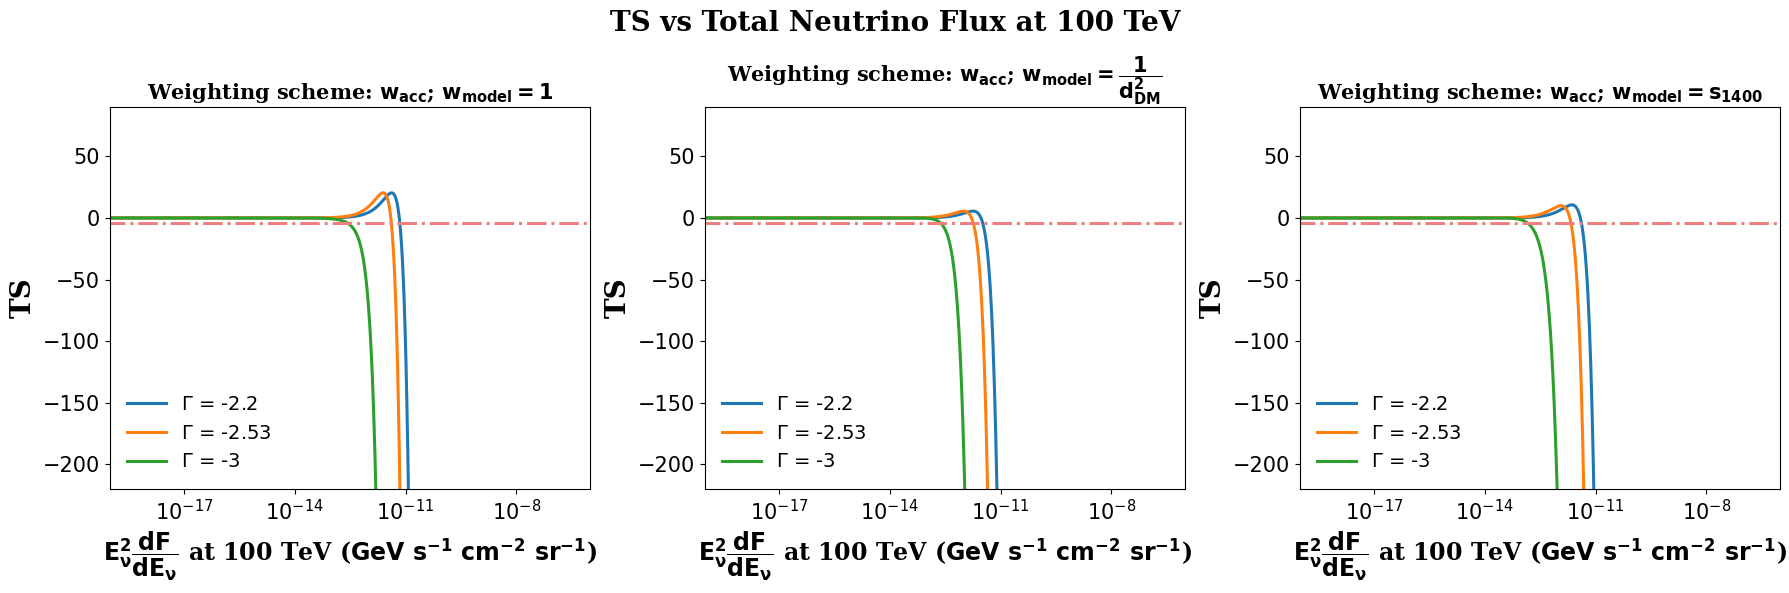

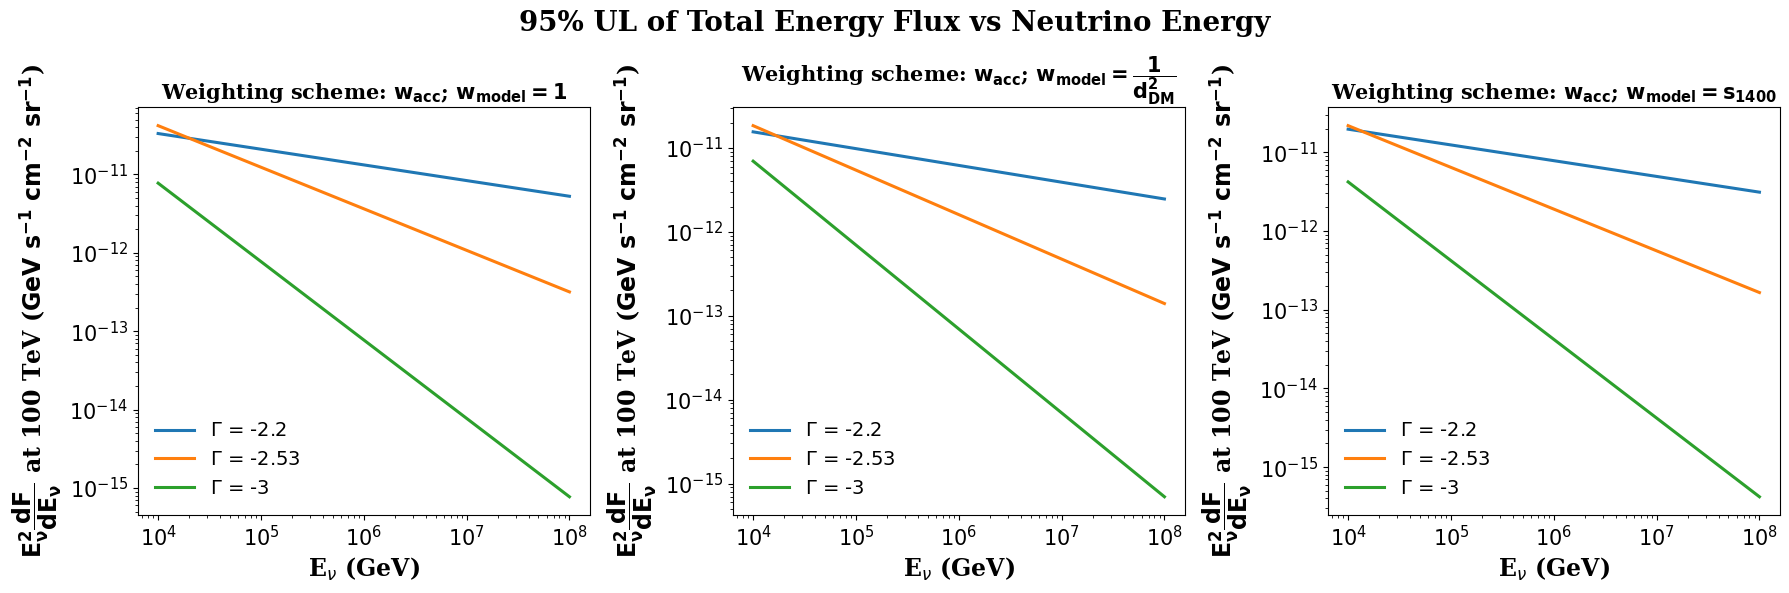

In [18]:
plotTS(5)

In [30]:
# def plotTS(REMOVED_SEASON):
# REMOVED_SEASON = 0
for REMOVED_SEASON in range(10):
    print('REMOVED_SEASON = ', REMOVED_SEASON)
    
    with open(altier_path[0] + f'all_TSS_{len(enus)}_bins_rm_s_{REMOVED_SEASON}.pkl', 'rb') as f:
        all_TSS = pickle.load(f)
        for i in range(len(all_TSS[1:])):
            print('model =', i+1)
            for g in range(len(all_TSS[1:][i][1:])):
                print(max(all_TSS[1:][i][g]))
                
    print()


REMOVED_SEASON =  0
model = 1
14.147973890125515
16.85921242033245
17.659936474647257
model = 2
1.5476236397152967
3.5594335005828035
4.964963914718721
model = 3
5.899515966716834
8.195653135466523
8.692868698015397

REMOVED_SEASON =  1
model = 1
9.65062322129527
12.679438434070327
14.771891259520487
model = 2
0.4141668766730412
1.6281558360055495
3.008679992410578
model = 3
4.055947600006451
6.398335279008579
7.336952482205394

REMOVED_SEASON =  2
model = 1
6.768605141674983
9.560010308189057
11.253451489907786
model = 2
0.27701179273853355
1.2604172179077513
2.2794101783567227
model = 3
3.778155504152239
5.302208684742199
5.566626911867403

REMOVED_SEASON =  3
model = 1
14.055598215140488
16.98559629521976
17.811538821551252
model = 2
1.4139172929579962
3.1912115813436843
4.320989447415184
model = 3
4.876078809554856
6.828383918236311
7.097250968597691

REMOVED_SEASON =  4
model = 1
16.43242782454605
18.413464314395487
18.057300875286213
model = 2
3.3772660501110363
5.569961074520888

In [31]:
with open(altier_path[0] + 'all_TSS_10000000_bins.pkl', 'rb') as f:
    all_TSS = pickle.load(f)
    for i in range(len(all_TSS[1:])):
        print('model =', i+1)
        for g in range(len(all_TSS[1:][i][1:])):
            print(max(all_TSS[1:][i][g])) 

model = 1
12.156029079799826
14.84465796283505
16.108398929508855
model = 2
1.295553975812755
3.1780342441556586
4.667547146796053
model = 3
4.653395679103512
6.8241564176842076
7.381386334454595
